<div style="text-align: center">
    <h1>Tugas Individu 1</h1>
    <h2>IBDA4311 - Computer Vision</h2>
    <h3>Dibuat Oleh: Stefannus Christian 202000138</h3>
</div>

# Import Libraries

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from math import ceil

# Functions

## plot_images & plot single_image

In [22]:
def plot_images(image_list: list, title_list: list, subplot_shape=(1,1), axis='off', fontsize=20, figsize=(4,4), cmap=['gray'], cbar=False):
    plt.figure(figsize=figsize)
    for ii, im in enumerate(image_list):
        c_title = title_list[ii]
        if len(cmap) > 1: c_cmap = cmap[ii]
        else: c_cmap = cmap[0]
        plt.subplot(subplot_shape[0], subplot_shape[1],ii+1)
        plt.imshow(im, cmap=c_cmap)
        plt.title(c_title, fontsize=fontsize)
        plt.axis(axis)
        if cbar: plt.colorbar()

def plot_single_image(img, img_title: str, cmap=None, fontsize=20, figsize=(7,7), axis="off"):
    plt.figure(figsize=figsize)
    try: plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    except: plt.imshow(img, cmap=cmap)
    plt.title(img_title, fontsize=fontsize)
    plt.axis(axis)
    plt.show()

## show_images_from_video

In [23]:
def show_images_from_video(video_path: str, save_image_to_path: str="./video/", num_images:int=15, save_frame_index:bool=None):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_step = max(total_frames // num_images, 1)
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret: break

        if save_frame_index is None:
            title = f"Frame {frame_count}"
            plot_single_image(frame,title)

        if save_frame_index is not None and frame_count == save_frame_index:
            filename = f"frame_{save_frame_index}.png"
            cv2.imwrite(save_image_to_path+filename, frame)

        frame_count += 1

        if frame_count >= num_images: break

        for _ in range(frame_step - 1): cap.grab()

    cap.release()
    if save_frame_index is None: plt.close()

## show_sobel_filter_edges & show_gradient_magnitude

In [24]:
def show_gradient_magnitude(img_path: str):

    img = cv2.imread(img_path)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ksize = 5

    # Blur the grayscale image
    gray_img = cv2.GaussianBlur(gray_img, (ksize, ksize), 0)

    # Edge extraction:
    k_x = np.array([[0, 0, 0], [-1, 0, 1], [0, 0, 0]])
    k_y = np.array([[0, -1, 0], [0, 0, 0], [0, 1, 0]])
    im_x = cv2.filter2D(gray_img, cv2.CV_64F, k_x)
    im_y = cv2.filter2D(gray_img, cv2.CV_64F, k_y)

    # Gradient magnitude:
    im_grad_mag = np.sqrt(np.square(im_x) + np.square(im_y))
    plot_single_image(im_grad_mag, "Gradient Magnitude", 'gray')

def show_sobel_filter_edges(img_path:str, original_title: str, title_x: str, title_y: str, kernel_size:int = 3):
    im = cv2.imread(img_path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_x = np.abs(cv2.Sobel(im, cv2.CV_64F, 1, 0, ksize=kernel_size))
    im_y = np.abs(cv2.Sobel(im, cv2.CV_64F, 0, 1, ksize=kernel_size))

    plot_images([im,im_x,im_y], [original_title,title_x,title_y], subplot_shape=(1,3), figsize=(30,20))
    show_gradient_magnitude(img_path)

## otsu_threshold

In [25]:
def otsu_threshold(img_path: str):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    bins_num = 256
    hist, bin_edges = np.histogram(image, bins=bins_num)
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]
    mean1 = np.cumsum(hist * bin_mids) / weight1
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    index_of_max_val = np.argmax(inter_class_variance)
    threshold = ceil(bin_mids[:-1][index_of_max_val])
    return threshold

## show_3_DoG_versions

In [26]:
def show_3_DoG_versions(img_path: str):
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Original Image")
    plt.axis('off')
    plt.show()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    low_sigma_vals = [1,3,5]
    high_sigma_vals = [13,11,9]

    for low,high in zip(low_sigma_vals, high_sigma_vals):
        low_sigma = cv2.GaussianBlur(img,(low,low),0)
        high_sigma = cv2.GaussianBlur(img,(high,high),0)

        dog = low_sigma - high_sigma

        low_sigma_title = f"Low σ = {low}"
        high_sigma_title = f"High σ = {high}"
        dog_title = "DoG result"
        titles = ["Original_Gray",low_sigma_title,high_sigma_title,dog_title]
        plot_images([img,low_sigma,high_sigma,dog], titles,
                    subplot_shape=(1,4), figsize=(20,5))

# find_otsu_threshold & show_canny

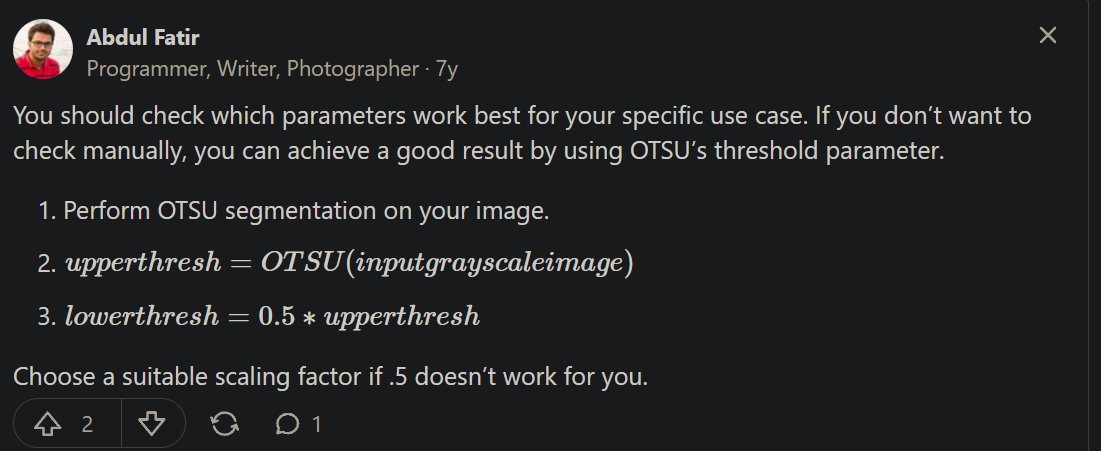

In [40]:
def find_otsu_threshold(img_path: str, scaling_factor: float):
    high_thresh = otsu_threshold(img_path)
    low_thresh = ceil(scaling_factor * high_thresh)
    return low_thresh, high_thresh

def show_canny(img_path: str):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    scaling_factors = np.linspace(0.1, 0.5, 5)
    for scaling_factor in scaling_factors:
        low_threshold, high_threshold = find_otsu_threshold(img_path, scaling_factor)
        im_canny = cv2.Canny(gray, low_threshold, high_threshold)
        title_list = ['Input',f'Low Th: {low_threshold} | High Th: {high_threshold} | Scaling Factor: {scaling_factor:.1f}']
        plot_images([gray, im_canny], title_list, subplot_shape=(1,2), figsize=(15,8))

# Pilihlah Sebuah Video dan Tampilkanlah minimum 5, maksimum 15 gambar dari video yang diberikan

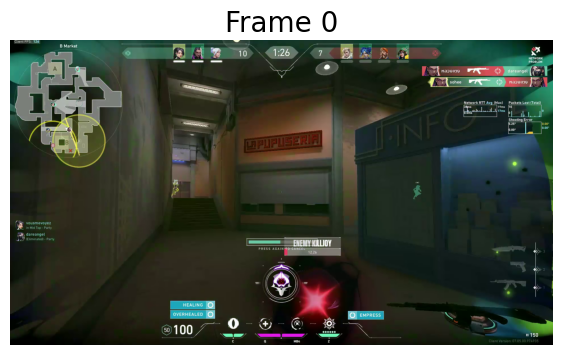

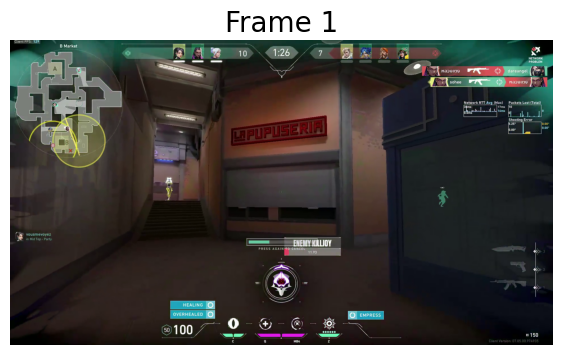

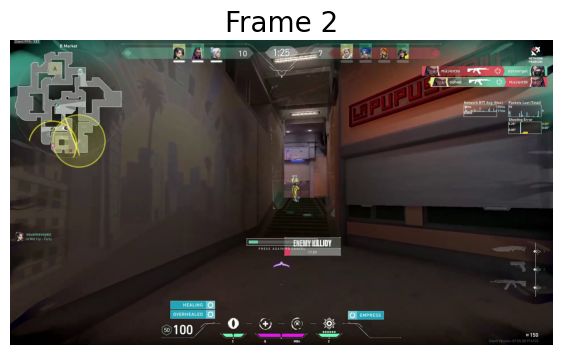

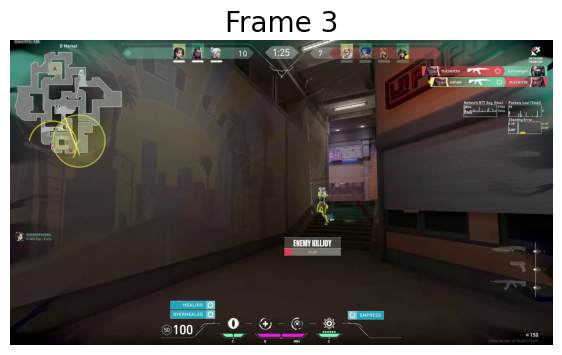

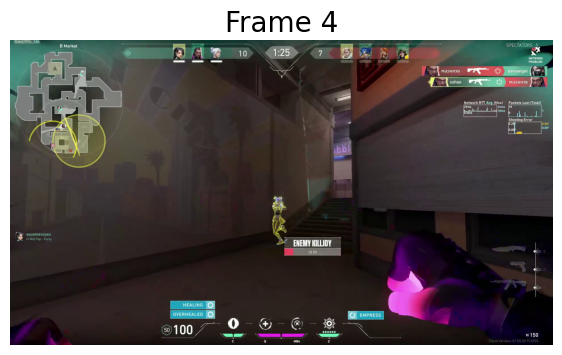

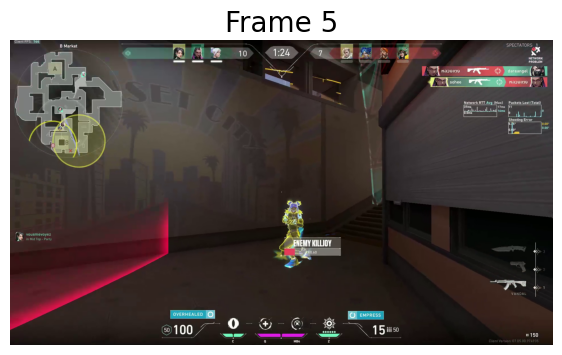

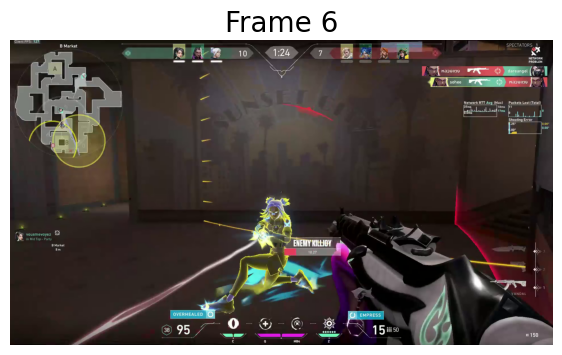

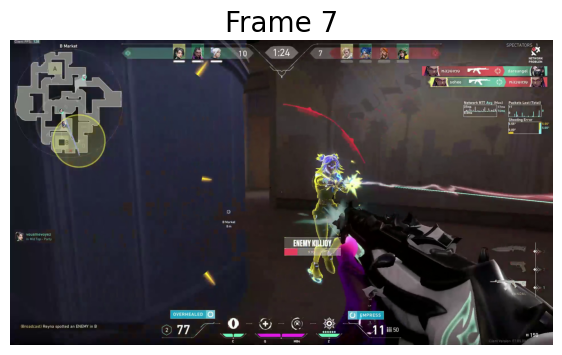

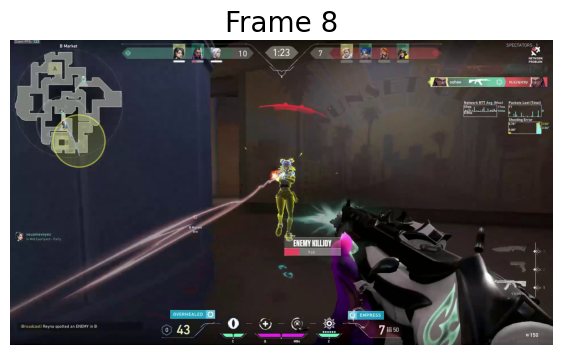

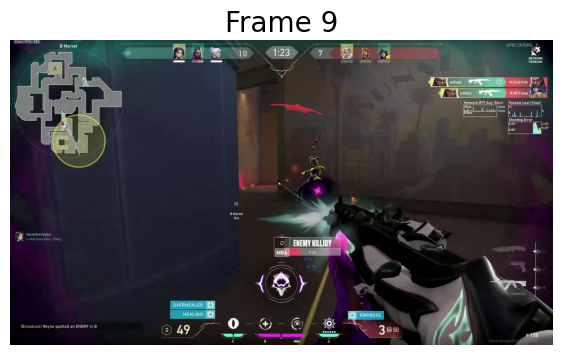

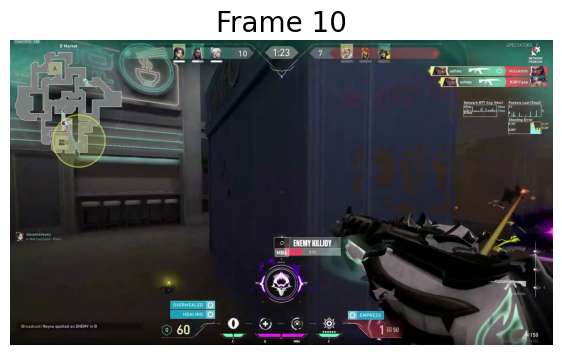

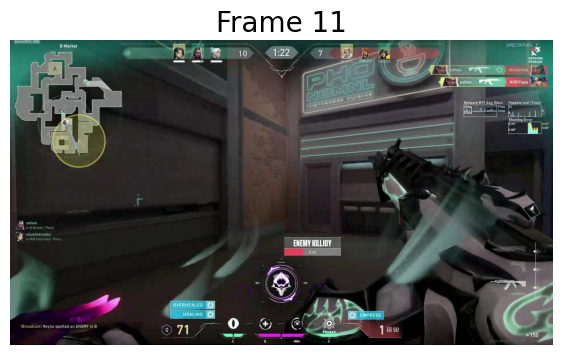

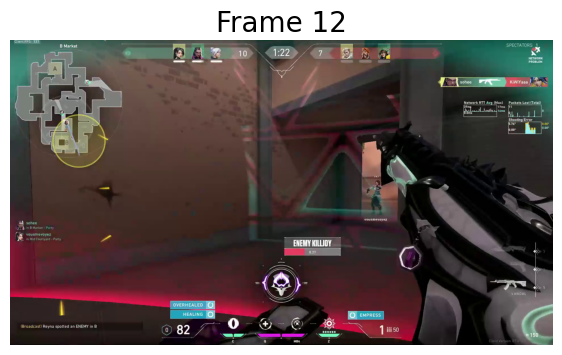

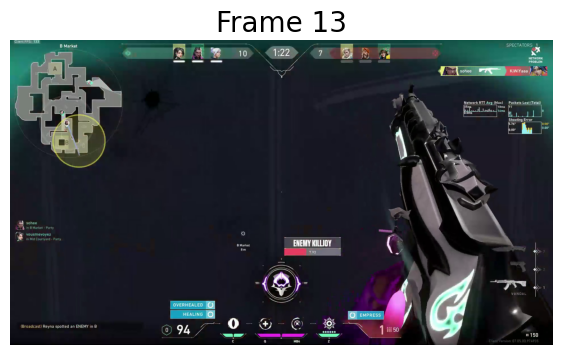

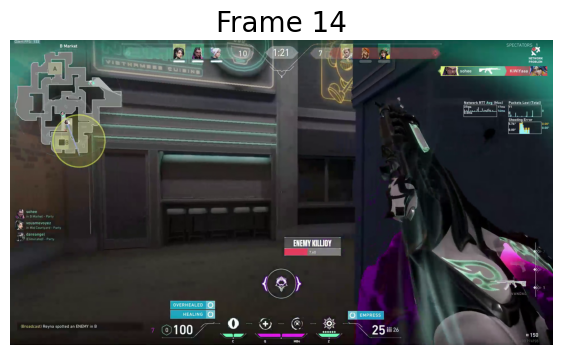

In [28]:
video_path = './video/video_tugas_1_cv.mp4'
show_images_from_video(video_path)

# Simpanlah salah satu gambar dalam bentuk .PNG

In [29]:
save_frame_index = 8
show_images_from_video(video_path, save_frame_index=save_frame_index)

# Tampilkanlah batas-batas (Edges) dengan menggunakan Filter Sobel dalam warna hitam putih

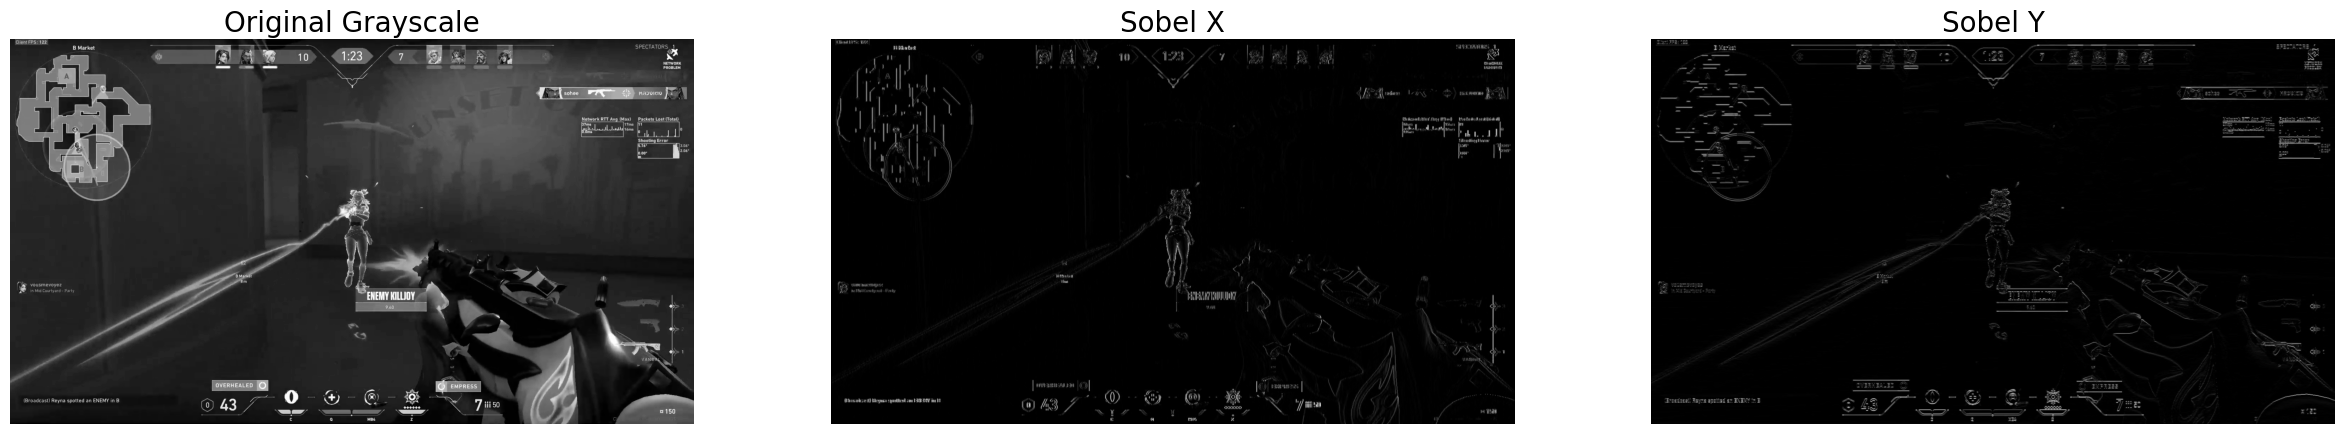

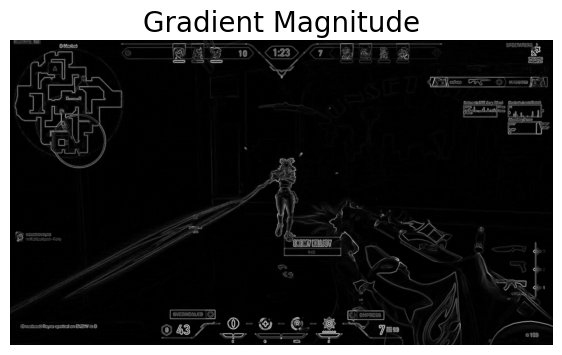

In [30]:
im_path = "./images/frame_8.png"
original_title = "Original Grayscale"
title_x = "Sobel X"
title_y = "Sobel Y"
show_sobel_filter_edges(im_path, original_title, title_x, title_y)

# Tampilkanlah batas-batas (Edges) dengan menggunakan 3 versi DoG dalam warna hitam putih

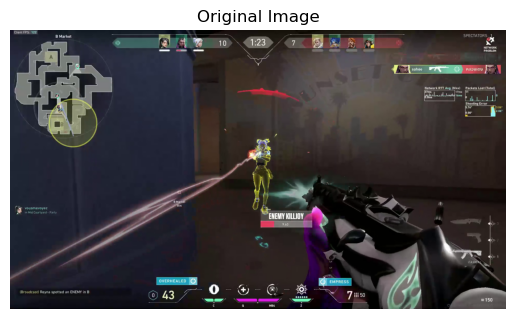

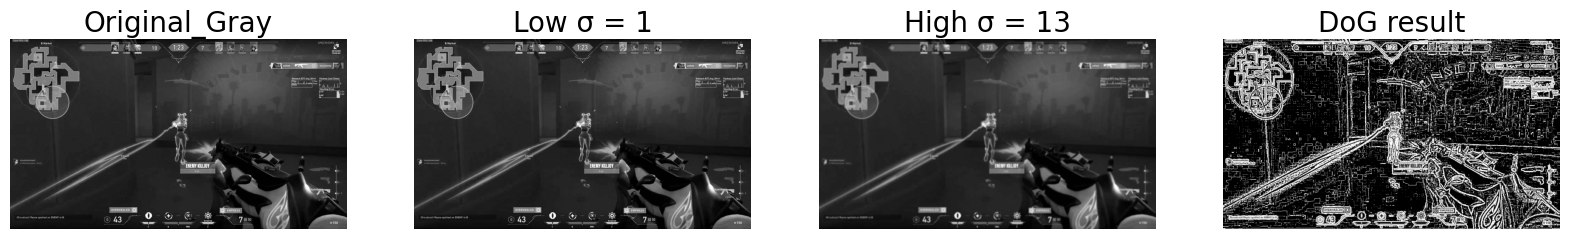

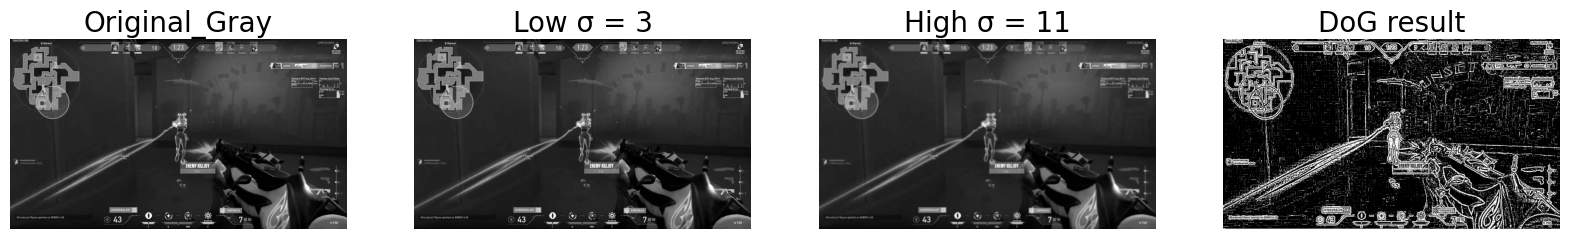

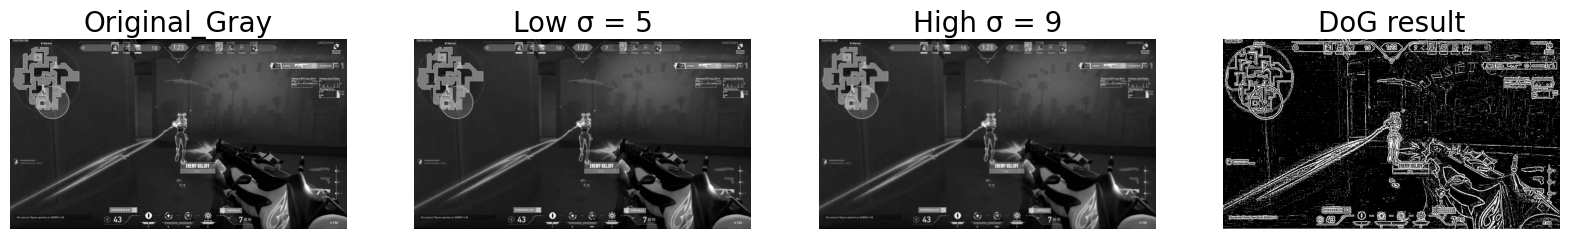

In [31]:
show_3_DoG_versions(im_path)

# Tampilkanlah batas-batas (Edges) dengan menggunakan Canny Edge Detection dalam warna hitam putih   

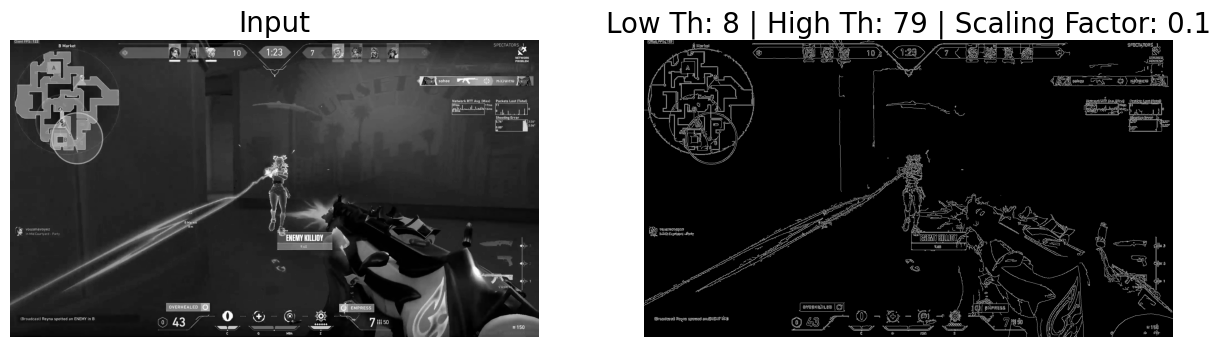

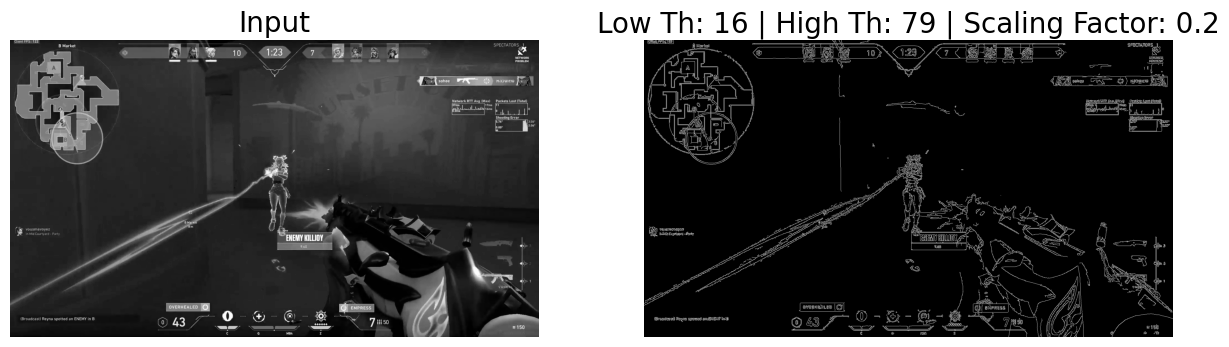

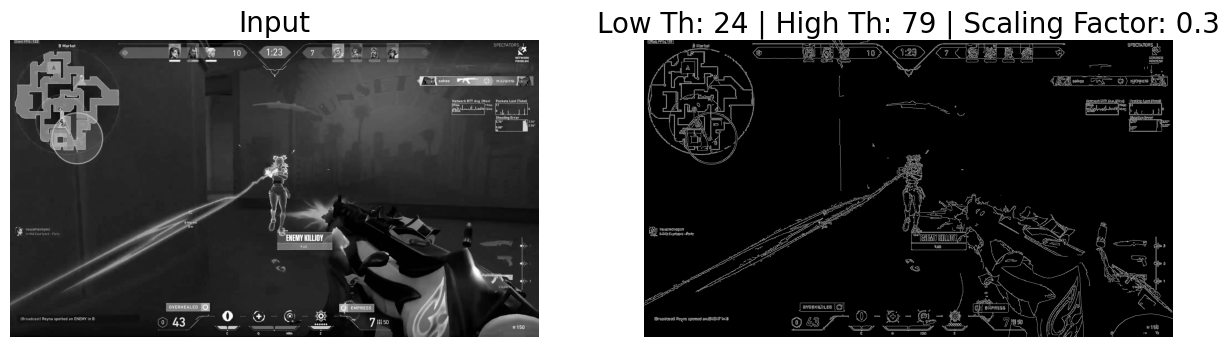

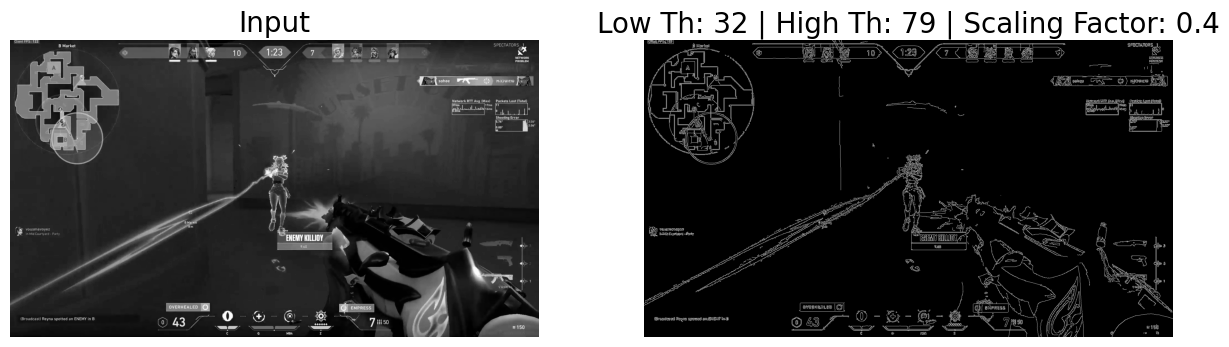

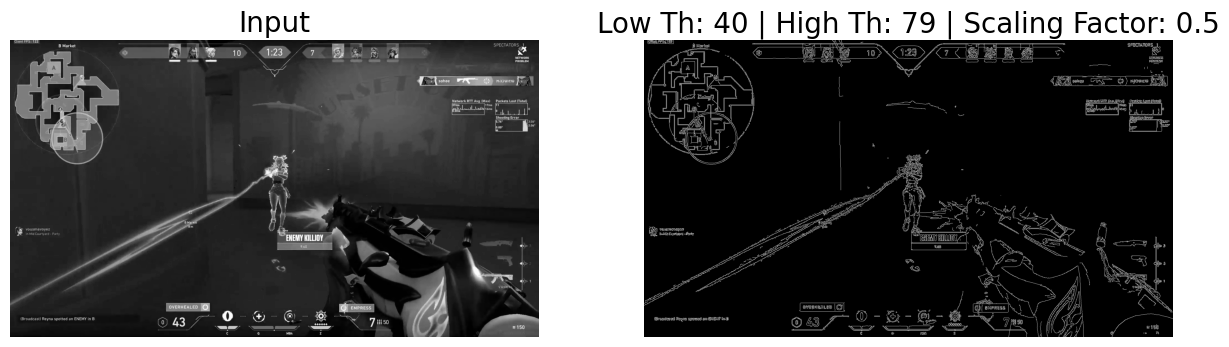

In [41]:
show_canny(im_path)